# Jupyter Notebook A
### Description
This notebook creates a product specific iCHO2048s, RECON2s, or iMM1685s model by adding the necessary lists of reactions, Gene-Protein-Reactions (GPRs), and reaction names.

### INPUT  

**Option A** (use it for proteins in PSIM) - A Uniprot ID from the PSIM file (CHO,Human, or Mouse) found in the **iCHO2048s_python**, **RECON2s_python**, or **iMM1685s_python** folder
    - EXAMPLE: entryID = 'G3HGQ6' (CHO)
    
**Option B** (use it for proteins not in PSIM) - A Protein-Specific Information Vector (python list) with the following entries:
    - Protein name (e.g. 'tPA' or 'EPO') 
    - Protein sequence 
    - Molecular weight (in Daltons)
    - Presence of Signal peptide (0 if absent, 1 if present)
    - Number of disulfide bonds
    - Presence of GPI anchor (0 if absent, 1 if present)
    - Number of N-linked glycans
    - Number of O-linked glycans
    - Location ([c] = cytoplasm, [m] = mitochondria, [pm] = plasma membrane, [r] = ER, [g] = Golgi, [n] = Nucleus, [l] = lysosome, [x] = peroxisome, [e] = extracellular protein (secreted))
    - EXAMPLE: PSIV = ['MyProtein','MAHFRTEYPNVCWQGED',100.0,'1','2','0','4','6','[e]']
    
### OUTPUT 

    - SBML file of secretory model
    - Matlab file of secretory model

## REQUIREMENTS

* Python >= 3.4
* Cobrapy >= 0.13.3

In [1]:
# Load Cobrapy package for building model
import cobra

# Create iCHO2048s reactions

In [2]:
# Load iCHO2048s_Builder package
import os
location = os.getcwd()
os.chdir('iCHO2048s_python/')
import iCHO2048s_Builder
os.chdir(location)
os.chdir('iCHO2048s_matlab/')
target_location = os.getcwd()
os.chdir(location)

In [3]:
# Load CHO metabolic model
model = cobra.io.load_matlab_model('iCHO2048s_matlab/iCHOv1.mat')

### Generate secretory model for a CHO protein (Option A)

In [7]:
# Fill in the Uniprot ID of your protein here
# Example: entryID = 'G3HGQ6'
entryID = 'G3HGQ6'
# Generate lists for reactions (rxns), reaction names (rxnNames), and Gene-Protein-Reactions (GPRs)
[rxns, rxnNames, GPRs] = iCHO2048s_Builder.generateProteinSpecificRxns_A(entryID)

# Initialize new model
secretory_model = model.copy()

# Add new reactions to metabolic model
for i in range(len(rxns)):
    # Create place holder for creating reactions
    r = secretory_model.reactions[0].copy()
    r.name = rxnNames[i]
    r.id = rxnNames[i]
    r.gene_reaction_rule = GPRs[i]
    secretory_model.add_reaction(r)
    r.build_reaction_from_string(reaction_str=rxns[i],rev_arrow='<-',fwd_arrow='->',reversible_arrow='<=>')

unknown metabolite 'G3HGQ6[c]' created
unknown metabolite 'SRP[c]' created
unknown metabolite 'G3HGQ6-SRP[c]' created
unknown metabolite 'SRPR[r]' created
unknown metabolite 'RRBP1[r]' created
unknown metabolite 'G3HGQ6-SRP-SRPR-RRBP1[c]' created
unknown metabolite 'SEC61C[r]' created
unknown metabolite 'G3HGQ6-SRP-SRPR-SEC61C[c]' created
unknown metabolite 'G3HGQ6-SEC61C[c]' created
unknown metabolite 'SRP14[c]' created
unknown metabolite 'SRP19[c]' created
unknown metabolite 'SRP54[c]' created
unknown metabolite 'SRP68[c]' created
unknown metabolite 'SRP72[c]' created
unknown metabolite 'SRPRA[r]' created
unknown metabolite 'SRPRB[r]' created
unknown metabolite 'SPC[r]' created
unknown metabolite 'G3HGQ6-SEC61-SPC[r]' created
unknown metabolite 'G3HGQ6-sp[r]' created
unknown metabolite 'SEC62[r]' created
unknown metabolite 'SEC63[r]' created
unknown metabolite 'TRAM1[r]' created
unknown metabolite 'TRAP[r]' created
unknown metabolite 'DNAJC1[r]' created
unknown metabolite 'SERP1[r]' 

In [7]:
# Save the model
cobra.io.save_matlab_model(secretory_model,'iCHO2048s_'+entryID+'.mat')
cobra.io.write_sbml_model(secretory_model,'iCHO2048s_'+entryID+'.xml')

In [6]:
secretory_model = cobra.io.load_matlab_model('iCHO2048s_G3HGQ6.mat')

In [9]:
# Set the objective to secretion of target protein
secretory_model.objective = entryID + '_Final_demand'

In [13]:
secretory_model.slim_optimize() # mmol of target protein/gDW/h

0.00022527472

In [16]:
import matplotlib.pyplot as plt

Text(0.5,1,'Productivity-for-growth trade-off')

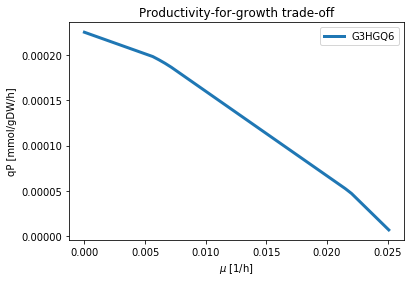

In [20]:
# Plot Pareto frontier of secretion-for-growth trade-off
secretory_model.objective = 'biomass_cho_producing'
max_growth = secretory_model.slim_optimize()
secretory_model.objective = entryID + '_Final_demand'
steps = 50
x = [max_growth/steps * i for i in range(steps)]
y = [0] * len(x)
for n in range(steps):
    mu_constraint = x[n]
    secretory_model.reactions.get_by_id('biomass_cho_producing').lower_bound = mu_constraint
    y[n] = secretory_model.slim_optimize()
plt.plot(x,y,linewidth=3,label=entryID)
plt.legend()
plt.xlabel('$\mu$ [1/h]')
plt.ylabel('qP [mmol/gDW/h]')
plt.title('Productivity-for-growth trade-off')

### Generate secretory reactions for a non-CHO protein (Option B)

In [ ]:
## Fill in the PSIV of your protein here ##
# The format must be PSIV = [Name, Sequence, MW, SP, DSB, GPI, NG, OG, Location]
# Example: PSIV = ['MyProtein','MAHFRTEYPNVCWQGED',100.0,'1','0','0','0','0','[e]']
PSIV = ['']

# Generate lists for reactions (rxns), reaction names (rxnNames), and Gene-Protein-Reactions (GPRs)
[rxns, rxnNames, GPRs] = iCHO2048s_Builder.generateProteinSpecificRxns_B(PSIV)

# Initialize new model
secretory_model = model.copy()

# Add new reactions to metabolic model
for i in range(len(rxns)):
    # Create place holder for creating reactions
    r = secretory_model.reactions[0].copy()
    r.name = rxnNames[i]
    r.id = rxnNames[i]
    r.gene_reaction_rule = GPRs[i]
    secretory_model.add_reaction(r)
    r.build_reaction_from_string(reaction_str=rxns[i],rev_arrow='<-',fwd_arrow='->',reversible_arrow='<=>')

In [ ]:
# Save the model
cobra.io.save_matlab_model(secretory_model,'iCHO2048s_'+entryID+'.mat')
cobra.io.write_sbml_model(secretory_model,'iCHO2048s_'+entryID+'.xml')

# Create RECON2s reactions

In [ ]:
# Load Human metabolic model
model = cobra.io.load_matlab_model('RECON2s_matlab/RECON2_2.mat')

In [1]:
# Load RECON2s_Builder package
import os
location = os.getcwd()
os.chdir('RECON2s_python/')
import RECON2s_Builder
os.chdir(location)
os.chdir('RECON2s_matlab/')
target_location = os.getcwd()
os.chdir(location)

### Generate secretory reactions for a HUMAN protein (Option A)

In [ ]:
# Fill in the Uniprot ID of your protein here
# Example: entryID = 'P31946'
entryID = ''
# Generate lists for reactions (rxns), reaction names (rxnNames), and Gene-Protein-Reactions (GPRs)
[rxns, rxnNames, GPRs] = RECON2s_Builder.generateProteinSpecificRxns_A(entryID)

# Initialize new model
secretory_model = model.copy()

# Add new reactions to metabolic model
for i in range(len(rxns)):
    # Create place holder for creating reactions
    r = secretory_model.reactions[0].copy()
    r.name = rxnNames[i]
    r.id = rxnNames[i]
    r.gene_reaction_rule = GPRs[i]
    secretory_model.add_reaction(r)
    r.build_reaction_from_string(reaction_str=rxns[i],rev_arrow='<-',fwd_arrow='->',reversible_arrow='<=>')

### Generate secretory reactions for a non-HUMAN protein (Option B)

In [ ]:
## Fill in the PSIV of your protein here ##
# The format must be PSIV = [Name, Sequence, MW, SP, DSB, GPI, NG, OG, Location]
# Example: PSIV = ['MyProtein','MAHFRTEYPNVCWQGED',100.0,'1','0','0','0','0','[e]']
##PSIV = []

# Generate lists for reactions (rxns), reaction names (rxnNames), and Gene-Protein-Reactions (GPRs)
[rxns, rxnNames, GPRs] = RECON2s_Builder.generateProteinSpecificRxns_B(PSIV)

# Initialize new model
secretory_model = model.copy()

# Add new reactions to metabolic model
for i in range(len(rxns)):
    # Create place holder for creating reactions
    r = secretory_model.reactions[0].copy()
    r.name = rxnNames[i]
    r.id = rxnNames[i]
    r.gene_reaction_rule = GPRs[i]
    secretory_model.add_reaction(r)
    r.build_reaction_from_string(reaction_str=rxns[i],rev_arrow='<-',fwd_arrow='->',reversible_arrow='<=>')

# Create iMM1685s reactions

In [ ]:
# Load Human metabolic model
model = cobra.io.load_matlab_model('iMM1685s_matlab/iMM1415.mat')

In [ ]:
# Load iMM1685s_Builder package
import os
location = os.getcwd()
os.chdir('iMM1685s_python/')
import iMM1685s_Builder
os.chdir(location)
os.chdir('iMM1685s_matlab/')
target_location = os.getcwd()
os.chdir(location)

### Generate secretory reactions for a MOUSE protein (Option A)

In [ ]:
# Fill in the Uniprot ID of your protein here
# Example: entryID = 'P31946'
entryID = ''
# Generate lists for reactions (rxns), reaction names (rxnNames), and Gene-Protein-Reactions (GPRs)
[rxns, rxnNames, GPRs] = iMM1685s_Builder.generateProteinSpecificRxns_A(entryID)

# Initialize new model
secretory_model = model.copy()

# Add new reactions to metabolic model
for i in range(len(rxns)):
    # Create place holder for creating reactions
    r = secretory_model.reactions[0].copy()
    r.name = rxnNames[i]
    r.id = rxnNames[i]
    r.gene_reaction_rule = GPRs[i]
    secretory_model.add_reaction(r)
    r.build_reaction_from_string(reaction_str=rxns[i],rev_arrow='<-',fwd_arrow='->',reversible_arrow='<=>')

### Generate secretory reactions for a non-MOUSE protein (Option B)

In [ ]:
## Fill in the PSIV of your protein here ##
# The format must be PSIV = [Name, Sequence, MW, SP, DSB, GPI, NG, OG, Location]
# Example: PSIV = ['MyProtein','MAHFRTEYPNVCWQGED',100.0,'1','0','0','0','0','[e]']
##PSIV = []

# Generate lists for reactions (rxns), reaction names (rxnNames), and Gene-Protein-Reactions (GPRs)
[rxns, rxnNames, GPRs] = iMM1685s_Builder.generateProteinSpecificRxns_B(PSIV)

# Initialize new model
secretory_model = model.copy()

# Add new reactions to metabolic model
for i in range(len(rxns)):
    # Create place holder for creating reactions
    r = secretory_model.reactions[0].copy()
    r.name = rxnNames[i]
    r.id = rxnNames[i]
    r.gene_reaction_rule = GPRs[i]
    secretory_model.add_reaction(r)
    r.build_reaction_from_string(reaction_str=rxns[i],rev_arrow='<-',fwd_arrow='->',reversible_arrow='<=>')